In [1]:
import os
os.chdir(r"/Users/Greer/Desktop/Lending Club - From Misha/Payments")

import numpy as np
import pandas as pd
import seaborn as sns

# Import LC_subset (first 2.5 M rows from LC)

In [2]:
import csv

## Check the attributes list
with open('LC_subset.csv', newline='') as f:
  reader = csv.reader(f)
  row1 = next(reader)
    
print(row1)

['', 'LOAN_ID', 'PBAL_BEG_PERIOD', 'PRNCP_PAID', 'INT_PAID', 'FEE_PAID', 'DUE_AMT', 'RECEIVED_AMT', 'PBAL_END_PERIOD', 'MOB', 'CO', 'COAMT', 'InterestRate', 'MONTHLYCONTRACTAMT', 'dti', 'MonthlyIncome', 'OpenCREDITLines', 'TotalCREDITLines', 'RevolvingCREDITBalance', 'RevolvingLineUtilization', 'Inquiries6M', 'DQ2yrs', 'MonthsSinceDQ', 'PublicRec', 'MonthsSinceLastRec', 'EmploymentLength', 'currentpolicy', 'term', 'APPL_FICO_BAND', 'Last_FICO_BAND', 'PCO_RECOVERY', 'PCO_COLLECTION_FEE', 'EarliestCreditMonths', 'HomeOwnCat']


In [24]:
df = pd.read_csv("LC_subset.csv", low_memory=False)
df.head()

Unnamed: 0  LOAN_ID  PBAL_BEG_PERIOD  PRNCP_PAID    INT_PAID  FEE_PAID  \
0           0    54734     25000.000000  581.297917  247.802083       0.0   
1           1    54734     24418.702083  587.059790  242.040210       0.0   
2           2    54734     23831.642293  592.878776  236.221224       0.0   
3           3    54734     23238.763518  598.755439  230.344561       0.0   
4           4    54734     22640.008078  604.690353  224.409647       0.0   

   DUE_AMT  RECEIVED_AMT  PBAL_END_PERIOD  MOB     ...      \
0    829.1         829.1     24418.702083    1     ...       
1    829.1         829.1     23831.642293    2     ...       
2    829.1         829.1     23238.763518    3     ...       
3    829.1         829.1     22640.008078    4     ...       
4    829.1         829.1     22035.317725    5     ...       

   MonthsSinceLastRec  EmploymentLength  currentpolicy  term  APPL_FICO_BAND  \
0                 0.0                 1              1    36             737   
1                 0.0                 1              1    36             737   
2                 0.0                 1              1    36             737   
3                 0.0                 1              1    36             737   
4                 0.0                 1              1    36             737   

   Last_FICO_BAND  PCO_RECOVERY  PCO_COLLECTION_FEE  EarliestCreditMonths  \
0             757           0.0                 0.0                 275.0   
1             757           0.0                 0.0                 275.0   
2             787           0.0                 0.0                 275.0   
3             782           0.0                 0.0                 275.0   
4             802           0.0                 0.0                 275.0   

   HomeOwnCat  
0           4  
1           4  
2           4  
3           4  
4           4  

[5 rows x 34 columns]

In [5]:
len(df)
# 2,500,000

2500000

In [25]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [26]:
df.reset_index

<bound method DataFrame.reset_index of          LOAN_ID  PBAL_BEG_PERIOD   PRNCP_PAID    INT_PAID  FEE_PAID  DUE_AMT  \
0          54734     25000.000000   581.297917  247.802083       0.0   829.10   
1          54734     24418.702083   587.059790  242.040210       0.0   829.10   
2          54734     23831.642293   592.878776  236.221224       0.0   829.10   
3          54734     23238.763518   598.755439  230.344561       0.0   829.10   
4          54734     22640.008078   604.690353  224.409647       0.0   829.10   
5          54734     22035.317725   610.684094  218.415906       0.0   829.10   
6          54734     21424.633631   616.737246  212.362754       0.0   829.10   
7          54734     20807.896384   622.850397  206.249603       0.0   829.10   
8          54734     20185.045987   629.024142  200.075858       0.0   829.10   
9          54734     19556.021845   635.259082  193.840918       0.0   829.10   
10         54734     18920.762764   641.555823  187.544177       0.0  

In [27]:
df.iloc[:4,:10]
# Note: PRNCP_PAID + INT_PAID = RECEIVED_AMT
# Comparing DUE_AMT and RECEIVED_AMT is actually default
# MOB = months on book... not necessary for payment level analysis BUT if did analysis by Loan_ID then critical
# CO = probably co-signer status... not necessary

LOAN_ID  PBAL_BEG_PERIOD  PRNCP_PAID    INT_PAID  FEE_PAID  DUE_AMT  \
0    54734     25000.000000  581.297917  247.802083       0.0    829.1   
1    54734     24418.702083  587.059790  242.040210       0.0    829.1   
2    54734     23831.642293  592.878776  236.221224       0.0    829.1   
3    54734     23238.763518  598.755439  230.344561       0.0    829.1   

   RECEIVED_AMT  PBAL_END_PERIOD  MOB  CO  
0         829.1     24418.702083    1   0  
1         829.1     23831.642293    2   0  
2         829.1     23238.763518    3   0  
3         829.1     22640.008078    4   0

In [31]:
df.iloc[:4,11:22]

InterestRate  MONTHLYCONTRACTAMT    dti  MonthlyIncome  OpenCREDITLines  \
0        0.1189               829.1  19.48    7083.333333             10.0   
1        0.1189               829.1  19.48    7083.333333             10.0   
2        0.1189               829.1  19.48    7083.333333             10.0   
3        0.1189               829.1  19.48    7083.333333             10.0   

   TotalCREDITLines  RevolvingCREDITBalance  RevolvingLineUtilization  \
0              42.0                   28854                     0.521   
1              42.0                   28854                     0.521   
2              42.0                   28854                     0.521   
3              42.0                   28854                     0.521   

   Inquiries6M  DQ2yrs  MonthsSinceDQ  
0          0.0     0.0            0.0  
1          0.0     0.0            0.0  
2          0.0     0.0            0.0  
3          0.0     0.0            0.0

In [13]:
df.iloc[:4,23:33]

MonthsSinceLastRec  EmploymentLength  currentpolicy  term  APPL_FICO_BAND  \
0                 0.0                 1              1    36             737   
1                 0.0                 1              1    36             737   
2                 0.0                 1              1    36             737   
3                 0.0                 1              1    36             737   

   Last_FICO_BAND  PCO_RECOVERY  PCO_COLLECTION_FEE  EarliestCreditMonths  \
0             757           0.0                 0.0                 275.0   
1             757           0.0                 0.0                 275.0   
2             787           0.0                 0.0                 275.0   
3             782           0.0                 0.0                 275.0   

   HomeOwnCat  
0           4  
1           4  
2           4  
3           4

In [ ]:
###### DROP LOAN_ID AND EXTRANEOUS/USELESS VARIABLES ######

df.drop(['LOAN_ID','CO','MonthsSinceDQ','MonthsSinceLastRec','currentpolicy','PCO_RECOVERY',
         'PCO_COLLECTION_FEE'], axis=1, inplace=True)

In [28]:
## Examine distribution of delinquency
df.DQ2yrs.value_counts()
df.PCO_RECOVERY.value_counts()
df.MOB.value_counts()
#df.PCO_COLLECTION_FEE.value_counts()

1     89103
2     88201
3     87737
4     87129
5     86486
6     85685
7     84745
8     83578
9     82255
10    80805
11    79397
12    77934
13    76404
14    74800
15    73174
16    71581
17    69946
18    68194
19    66474
20    64814
21    63042
22    61305
23    59490
24    57628
25    55829
26    54083
27    52322
28    50517
29    48715
30    46918
      ...  
41     8365
42     8059
43     7731
44     7168
45     6592
46     6032
47     5506
48     5060
49     4657
50     4283
51     3950
52     3684
53     3406
54     3144
55     2760
56     2494
57     2183
58     1948
59     1692
60     1488
61      109
62       26
63       16
64       13
65       12
0        11
66        7
67        4
68        3
69        2
Name: MOB, dtype: int64

In [23]:
###### SOME GRAPHICAL ANALYSIS ######

### Highly Correlated Data
## examine our dataframe's correlation matrix and drop highly correlated/redundant data to address multicollinearity
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.65) | (cor < -0.65)]

Series([], dtype: float64)

In [ ]:
###### DROP 11 HIGHLY MULTICOLLINEAR (rho > |.55|) VARIABLES and LOAN_ID ######

# df.drop(['INT_PAID','DUE_AMT','RECEIVED_AMT','PBAL_END_PERIOD','COAMT','MONTHLYCONTRACTAMT','TotalCREDITLines',
#          'MonthsSinceLastRec','APPL_FICO_BAND','PCO_COLLECTION_FEE'], axis=1, inplace=True)

# RFC deals well with multicollinearity, so leave collinear vars in for now

In [6]:
###### DROP VARS THAT ARE NOT IN LC_misha_var.remove('PCO_RECOVERY')

LC_misha_var.remove('PCO_COLLECTION_FEE')
LC_misha_var.remove('Last_FICO_BAND')
LC_misha_var.remove('VINTAGE')
LC_misha_var.remove('currentpolicy')
LC_misha_var.remove('grade')

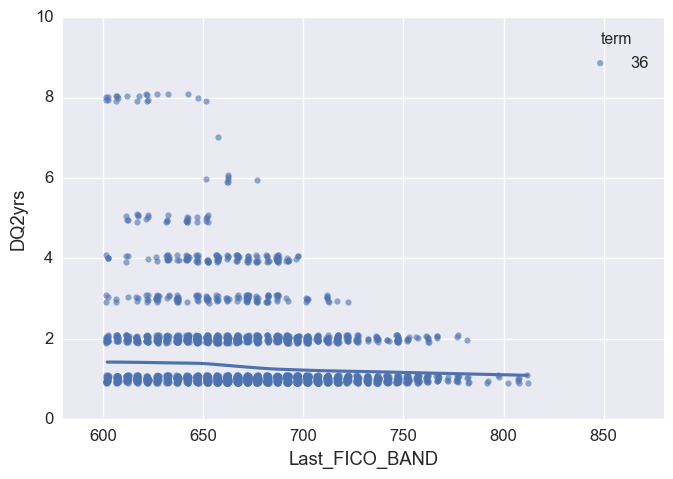

In [46]:
## Plot to examine the relationship between DQ2yrs and FICO score

plot_df = df.query('DQ2yrs > 0 & Last_FICO_BAND > 600')[:3000]

sns.set(font_scale=1.2, rc={"lines.linewidth": 1.5}) 

g = sns.lmplot("Last_FICO_BAND", "DQ2yrs", x_jitter= .7,  y_jitter= .1,
           data=plot_df, hue='term',lowess=True, size=5,aspect=1.4, legend_out=False,
           scatter_kws={ 's':20, 'alpha':.6})

g.set(xlim=(580, 880),ylim=(0, 10),alpha = .5)

g.savefig('LC_Subset_DQ2y_FICO.png',transparent=True)
sns.plt.show()

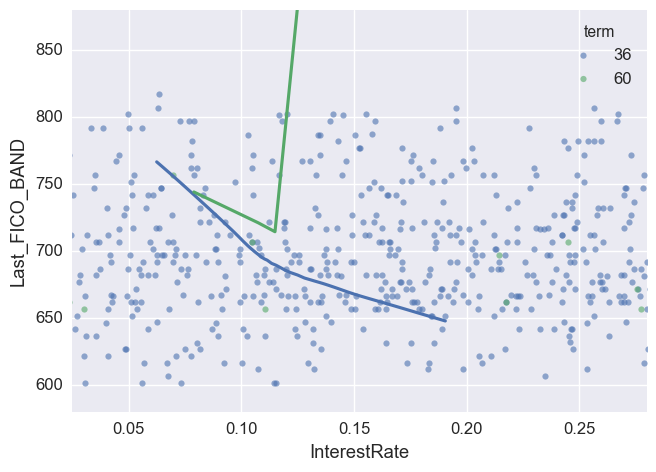

In [27]:
## Plot to examine the relationship between interest rate and FICO score
plot_df = df.query('Last_FICO_BAND > 600 & InterestRate < .28')[:3000]

sns.set(font_scale=1.2, rc={"lines.linewidth": 1.5}) 

g = sns.lmplot("InterestRate", "Last_FICO_BAND", x_jitter= .7,  y_jitter= .1,
           data=plot_df, hue='term',lowess=True, size=5,aspect=1.4, legend_out=False,
           scatter_kws={ 's':20, 'alpha':.6})

g.set(xlim=(.025, .28),ylim=(580, 880),alpha = .5)

g.savefig('LC_Subset_iFICO.png',transparent=True)
sns.plt.show()

In [7]:
######################################### IMPORTANT ######################################### 

###### DROP Last_FICO_BAND since we ultimately want to link that to default prediction ######
df.drop('Last_FICO_BAND', axis=1, inplace=True)

###### DROP Months_Since_DQ since it's perfectly correlated to default prediction ######
df.drop('MonthsSinceDQ', axis=1, inplace=True)

In [10]:
df.shape
list(df)

['PBAL_BEG_PERIOD',
 'PRNCP_PAID',
 'FEE_PAID',
 'MOB',
 'CO',
 'InterestRate',
 'dti',
 'MonthlyIncome',
 'OpenCREDITLines',
 'RevolvingCREDITBalance',
 'RevolvingLineUtilization',
 'Inquiries6M',
 'DQ2yrs',
 'PublicRec',
 'EmploymentLength',
 'currentpolicy',
 'term',
 'PCO_RECOVERY',
 'EarliestCreditMonths',
 'HomeOwnCat']

In [36]:
## Count occurrences of every potential value of DQ2yrs
df.DQ2yrs.value_counts()

0.0     2213298
1.0      213703
2.0       47973
3.0       15118
4.0        5134
5.0        2382
6.0         893
7.0         786
8.0         218
9.0         152
10.0        127
11.0        125
13.0         37
18.0         32
12.0         22
Name: DQ2yrs, dtype: int64

In [11]:
###### CONSTRUCT DEPENDENT VARIABLE ######

##### MVP: Binary Classification of Default, 0-1

n = len(df)
Default = []
    
for i in range(0,n):
    if i % 250000 == 0:
        print("evaluating row %d" %i)
    string = df.iloc[i]['DQ2yrs']
    if string == 0.0:
        Default.append(0)
    else:
        Default.append(1)

evaluating row 0
evaluating row 250000
evaluating row 500000
evaluating row 750000
evaluating row 1000000
evaluating row 1250000
evaluating row 1500000
evaluating row 1750000
evaluating row 2000000
evaluating row 2250000


In [9]:
###### COUNT OF DEPENDENT VARIABLE: Default (categorical for DQ2yrs) ######
df.DQ2yrs.value_counts()

### INSERT Default as 1st column of df
df.insert(0,'Default',Default)
df.drop('DQ2yrs', axis=1, inplace=True)

In [12]:
df.head()

Default  PBAL_BEG_PERIOD  PRNCP_PAID  FEE_PAID  MOB  CO  InterestRate  \
0        0     25000.000000  581.297917       0.0    1   0        0.1189   
1        0     24418.702083  587.059790       0.0    2   0        0.1189   
2        0     23831.642293  592.878776       0.0    3   0        0.1189   
3        0     23238.763518  598.755439       0.0    4   0        0.1189   
4        0     22640.008078  604.690353       0.0    5   0        0.1189   

     dti  MonthlyIncome  OpenCREDITLines     ...      \
0  19.48    7083.333333             10.0     ...       
1  19.48    7083.333333             10.0     ...       
2  19.48    7083.333333             10.0     ...       
3  19.48    7083.333333             10.0     ...       
4  19.48    7083.333333             10.0     ...       

   RevolvingLineUtilization  Inquiries6M  MonthsSinceDQ  PublicRec  \
0                     0.521          0.0            0.0        0.0   
1                     0.521          0.0            0.0        0.0   
2                     0.521          0.0            0.0        0.0   
3                     0.521          0.0            0.0        0.0   
4                     0.521          0.0            0.0        0.0   

   EmploymentLength  currentpolicy  term  PCO_RECOVERY  EarliestCreditMonths  \
0                 1              1    36           0.0                 275.0   
1                 1              1    36           0.0                 275.0   
2                 1              1    36           0.0                 275.0   
3                 1              1    36           0.0                 275.0   
4                 1              1    36           0.0                 275.0   

   HomeOwnCat  
0           4  
1           4  
2           4  
3           4  
4           4  

[5 rows x 21 columns]

In [11]:
df.Default.value_counts()

0    2213298
1     286702
Name: Default, dtype: int64

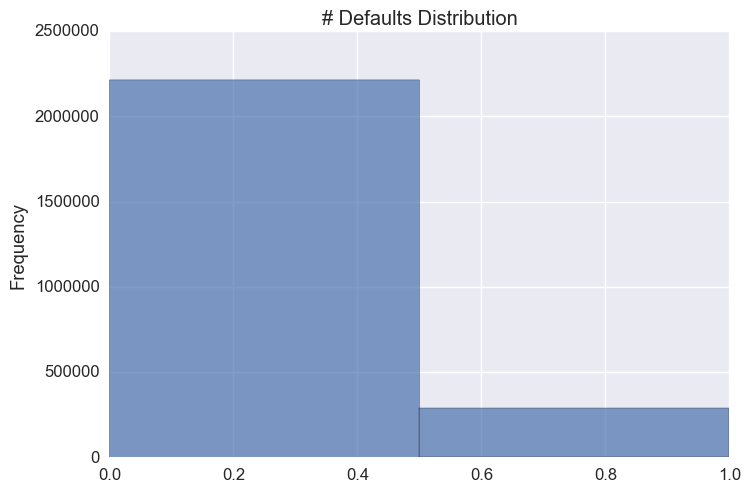

In [62]:
###### DISTRIBUTION OF DEPENDENT VARIABLE: Default (categorical for DQ2yrs) ######
import matplotlib.pyplot as plt

y = df.Default.values
np.unique(y), pd.Series(y).plot(kind='hist',alpha=.7, bins=2, title='# Defaults Distribution')
plt.show()

In [10]:
###### RANDOM FOREST - Categorical DV ######

## GridSearch first for best parameters of RFC
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier  # takes in categorical DV
from sklearn.ensemble import RandomForestRegressor   # continuous DV

# X = Explanatory
X = df[['PBAL_BEG_PERIOD','PRNCP_PAID','FEE_PAID','MOB','CO','InterestRate','dti','MonthlyIncome','OpenCREDITLines',
        'RevolvingCREDITBalance','RevolvingLineUtilization','Inquiries6M','PublicRec',
        'EmploymentLength','currentpolicy','term','PCO_RECOVERY','EarliestCreditMonths','HomeOwnCat']]
# y = Target
y = df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# The classes are either '1' or '0' where the ratio of class '0':'1' is 7.72:1
weight0 = 1
weight1 = 8
cl_weight = {0:weight0, 1:weight1}
# Sample weights you want the model to train on: default is 1, equal weights

# Build a classification task using 10 informative features
X, y = make_classification(n_samples=1000,
                           n_features=19,
                           n_informative=19,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

####
# cl_weight = {0:weight1, 1:weight2}
# clf = RandomForestClassifier(n_estimators=400, max_depth=None, min_samples_split=2, random_state=0, oob_score=True, class_weight = cl_weight, criterion=âgini")
# sample_weight = np.array([weight if m == 1 else 1 for m in df_tr[label_column]])
# y_pred = clf.fit(X_tr, y_tr,sample_weight= sample_weight).predict(X_te)
####
                             
# rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=20, oob_score = True, class_weight = cl_weight) 
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=50, class_weight = cl_weight) 

rfc.fit(X_train, y_train)
results = rfc.predict(X_test)
prob = rfc.predict_proba(X_test)

In [82]:
##### Plot training deviance

params = {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

# for i, y_pred in enumerate(rfc.staged_predict(X_test)):
#     test_score[i] = rfc.loss_(y_test, y_pred)

accuracy_test = []
m = len(results)

for i in range(0,m):
    error = y_test[i-1:i] - results[i]
    accuracy_test.append(error)

plt.plot(accuracy_test)
plt.show()

ValueError: setting an array element with a sequence.

In [11]:
### Show DataFrame with Predictions next to actual

# df['prediction']=np.array(results)
# df1 = df[['dti','prediction']]
# df1.head()

# df1 = np.array()
pred = np.asarray(results)
# A = np.array([X_test,y_test,results])

A = np.array([X_test,y_test,pred])

# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title('Deviance')
# # plt.plot(np.arange(len(results)) + 1, accuracy_train, 'b-',
# #          label='Training Set Deviance')
# plt.plot(np.arange(len(results)), accuracy_test, 'r-',
#          label='Test Set Deviance')
# plt.legend(loc='upper right')
# plt.xlabel('Boosting Iterations')
# plt.ylabel('Deviance')
# plt.show()

In [ ]:
A[0:10]

/Users/Greer/anaconda3/lib/python3.5/site-packages/pandas/indexes/base.py:2482: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


In [59]:
accuracy = []
m = len(results)

for i in range(0,m):
    error = y_test[i-1:i] - results[i]
    accuracy.append(error)

In [78]:
accuracy[0:5]

[Series([], Name: Default, dtype: int64), 103401    0
 Name: Default, dtype: int64, 2167674   -1
 Name: Default, dtype: int64, 202020    1
 Name: Default, dtype: int64, 337217   -1
 Name: Default, dtype: int64]

In [ ]:
# index = pd.RangeIndex(start=0, stop=m, step=1)
# temp = pd.Series(accuracy, index=index)

print(sum(x==0 for x in accuracy))

# s = (temp == 0).sum(axis=1)
# accu = s/m
# accu

In [53]:
##### Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, results)
print("MSE: %.4f" % mse)

MSE: 0.0000


In [69]:
print(feature_importance)

[  2.82868905e-01   4.77419050e-01   1.25998153e-03   7.60726550e-02
   9.26314314e-04   4.89923729e+00   1.02044961e+00   1.23066982e+00
   7.84093603e-01   1.99644590e+00   1.48161213e+00   3.34602033e-01
   1.00000000e+02   9.59963769e-02   4.60461428e-01   4.54006726e-02
   2.69952807e-01   1.48739713e-03   2.09220415e+00   2.84636495e-01]


In [1]:
###### Important Features Ranking ######

X_titles = ['PBAL_BEG_PERIOD','PRNCP_PAID','FEE_PAID','MOB','CO','InterestRate','dti','MonthlyIncome','OpenCREDITLines',
            'RevolvingCREDITBalance','RevolvingLineUtilization','Inquiries6M','PublicRec',
            'EmploymentLength','currentpolicy','term','PCO_RECOVERY','EarliestCreditMonths','HomeOwnCat']

feature_names = np.array(X_titles)
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_
                            for tree in rfc.estimators_], axis=0)
#indices = np.argsort(X_titles)[::-1]
indices = np.argsort(feature_importance)

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

NameError: name 'np' is not defined

In [79]:
len(importances)

19

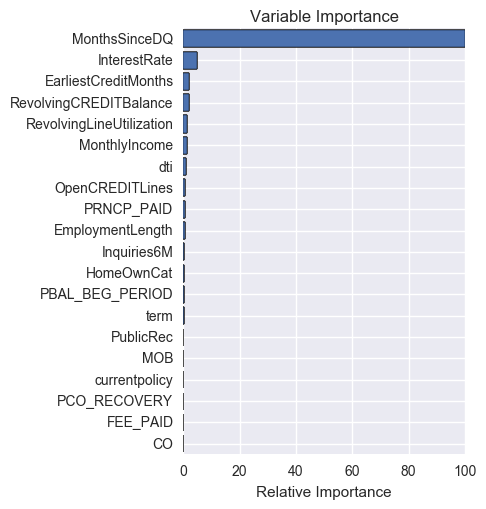

In [21]:
###### Plot the feature importances of the forest ######
from matplotlib import pyplot as plt

feature_importance = rfc.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
########### EXTRA STUFF (BELOW), NOT YET HAD TIME FOR ###########

In [37]:
# savetxt('RF_fit.csv', rfc.predict(X_test), delimiter=',', fmt='%f')
    
# param_grid = { 
#     'n_estimators': [200, 700],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# y_pred = CV_rfc.fit(X, y).predict(X_test)
# print(CV_rfc.best_params_)
# print(y_pred)

In [ ]:
##### Gradient Boosted Regression Trees
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

X, y = shuffle(df.values, y, random_state=30)
X = X.astype(np.float32)

offset = int(X.shape[0] * 0.75)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

##### Estimate Best Parameters
from sklearn.grid_search import GridSearchCV

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6],
              'min_samples_leaf': [3, 5, 9, 17],
              'max_features': [1.0, 0.3, 0.1]
              }
# param_grid = {'learning_rate': [0.1],
#               'max_depth': [4],
#               'min_samples_leaf': [3],
#               'max_features': [1.0],
#               }

est = GridSearchCV(ensemble.GradientBoostingRegressor(n_estimators=100),
                   param_grid, n_jobs=4, refit=True)

est.fit(X_train, y_train)

best_params = est.best_params_

##### Run the Gradient Boosting 
est = ensemble.GradientBoostingRegressor(n_estimators=2000).fit(X_train, y_train)

##### Get 
est.score(X_test,y_test)

In [ ]:
##### Look at Partial Dependence Plots to understand the functional relations between predictors and an outcome
## capture marginal effect of a given variable or variables on the target function, in this case defaults

from sklearn.ensemble.partial_dependence import plot_partial_dependence

comp_features = [('annual_inc','dti'),'loan_amnt','Last_FICO_BAND','annual_inc', 'inq_last_6mths', 'revol_util', 'dti']

fig, axs = plot_partial_dependence(est, X_train, comp_features,
                                   feature_names=list(df.columns),
                                   figsize=(14, 14), n_jobs=4)

In [39]:
##### Additional plots to look at relationships

## TAKES A REAAAALLLLY LONG TIME, BUT LOOKS COOL.. HEAT MAP TYPE PLOT

# sns.jointplot(y,df.Last_FICO_BAND.values,annot_kws=dict(stat="r"),
#               kind="kde", color="#4CB391").set_axis_labels("DQ2yrs", "Last_FICO_BAND")
# sns.plt.show()

KeyboardInterrupt: 